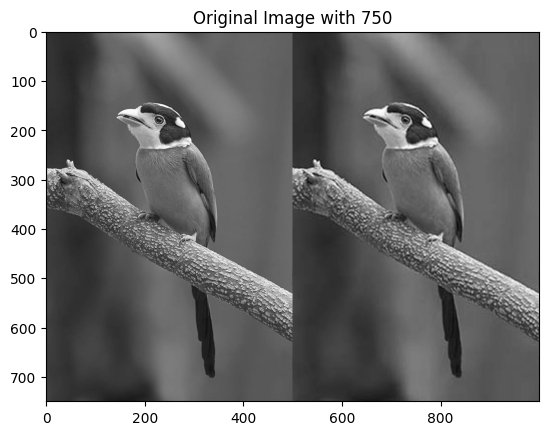

In [1]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

image_url = "https://upload.wikimedia.org/wikipedia/commons/b/b2/JPEG_compression_Example.jpg"

# image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcYkADf34lxq-cL9rJqWQ0PT0SwFk5r_FZVQ&usqp=CAU"
image = io.imread(image_url, as_gray=True) # Use io from skimage
plt.imshow(image, cmap='gray')
plt.title("Original Image with 750")
plt.show()

In [2]:
U, S, Vt = np.linalg.svd(image, full_matrices=False)
U.shape, S.shape, Vt.shape

((750, 750), (750,), (750, 1000))

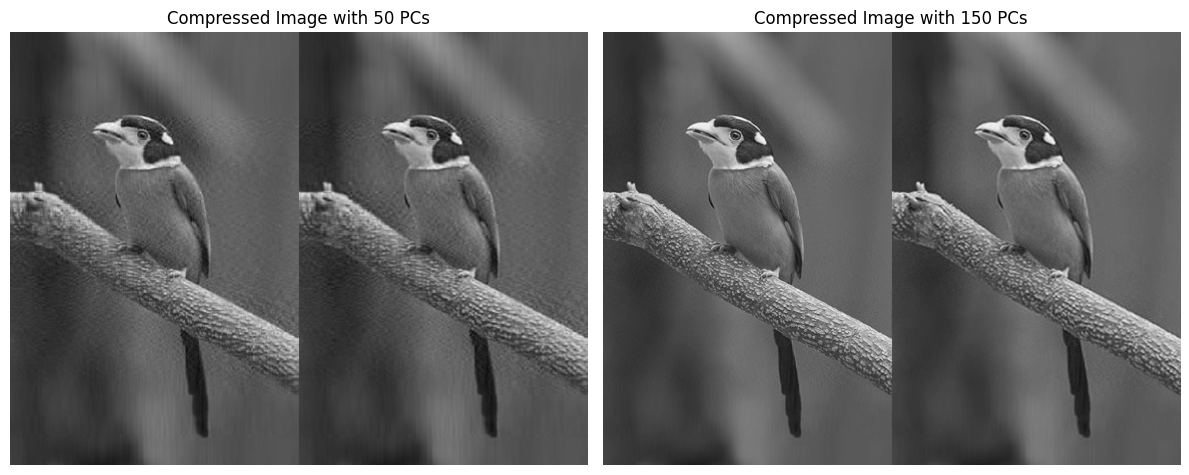

In [3]:
k1,k2= 50,150
compressed_image_50 = np.dot(U[:, :k1], np.dot(np.diag(S[:k1]), Vt[:k1, :]))
compressed_image_150 = np.dot(U[:, :k2], np.dot(np.diag(S[:k2]), Vt[:k2, :]))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(compressed_image_50, cmap='gray')
axes[0].set_title("Compressed Image with 50 PCs")
axes[0].axis('off')
axes[1].imshow(compressed_image_150, cmap='gray')
axes[1].set_title("Compressed Image with 150 PCs")
axes[1].axis('off')
plt.tight_layout()
plt.show()


Original image data size: 1313250 elements
Compressed image with 50 PCs has compressed data size: 87550 elements
Compression ratio: 0.0667
Compressed image with 100 PCs has compressed data size: 175100 elements
Compression ratio: 0.1333
Compressed image with 150 PCs has compressed data size: 262650 elements
Compression ratio: 0.2000
Compressed image with 200 PCs has compressed data size: 350200 elements
Compression ratio: 0.2667
Compressed image with 250 PCs has compressed data size: 437750 elements
Compression ratio: 0.3333
Compressed image with 300 PCs has compressed data size: 525300 elements
Compression ratio: 0.4000
Compressed image with 350 PCs has compressed data size: 612850 elements
Compression ratio: 0.4667
Compressed image with 450 PCs has compressed data size: 787950 elements
Compression ratio: 0.6000


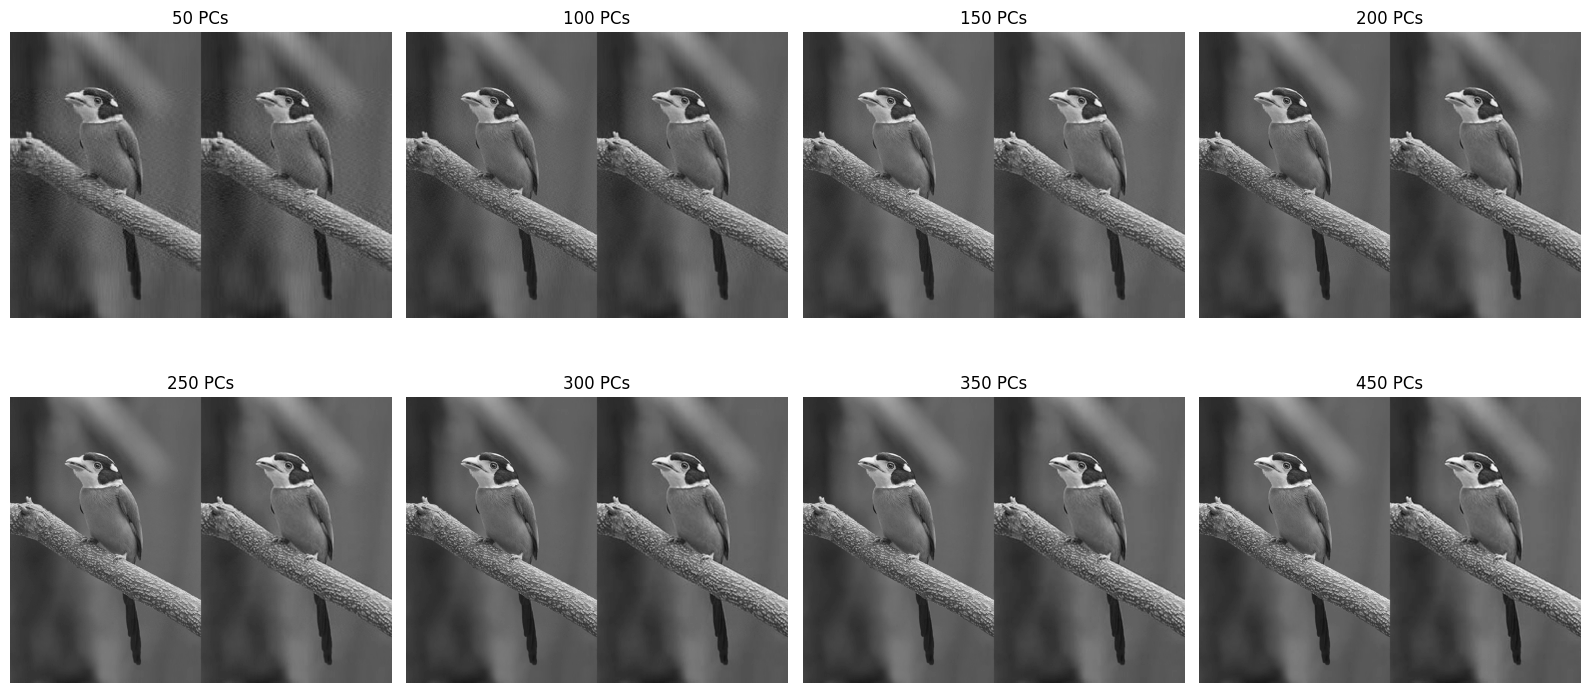

In [11]:
original_size = U.size + S.size + Vt.size
print(f"Original image data size: {original_size} elements")
k=[50,100,150,200,250,300,350,450]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust rows/columns based on the number of images

for i in range(len(k)):
    # Compress the image using the first k[i] singular values/vectors
    compressed_image = np.dot(U[:, :k[i]], np.dot(np.diag(S[:k[i]]), Vt[:k[i], :]))

    # Calculate the size of the compressed data
    size_U = U[:, :k[i]].size
    size_S = S[:k[i]].size
    size_Vt = Vt[:k[i], :].size
    total_size = size_U + size_S + size_Vt

    # Calculate compression ratio
    compression_ratio = total_size / original_size

    # Print the size and compression ratio
    print(f"Compressed image with {k[i]} PCs has compressed data size: {total_size} elements")
    print(f"Compression ratio: {compression_ratio:.4f}")

    # Plot the compressed image
    ax = axes[i // 4, i % 4]
    ax.imshow(compressed_image, cmap='gray')
    ax.set_title(f"{k[i]} PCs")
    ax.axis('off')

plt.tight_layout()
plt.show()